In [1]:
from deepbench.astro_object import SpiralGalaxyObject
from deepbench.astro_object import GalaxyObject
from deepbench.astro_object import StarObject
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [3]:
def add_poisson_noise(image: np.array, snr: float) -> np.array:
    """
    Adds Poisson noise to an image with a specified intensity.

    Args:
        image (numpy.ndarray): The input image is a 256 x 256 x 3 numpy array.
        snr (float): Normalized snr value (between 0 and 1)

    Returns:
        numpy.ndarray: The noisy image as a 256 x 256 x 3 numpy array.
    """
    
    if (snr > 1) or (snr < 0):
        raise ValueError('Unphysical SNR value. Specify 0 < snr < 1')
    
    signal_level = np.mean(image)
    noise_level = signal_level / snr - signal_level
    noise = np.random.poisson(lam=noise_level, size=image.shape).astype(np.float64)
    noisy_image = image + noise
    
    # Ensure values are within the correct range
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image

In [4]:
dataset_size = 15000
image_size = 100

In [5]:
spirals = np.zeros((dataset_size // 3, image_size, image_size))
noisy_spirals = np.zeros((dataset_size // 3, image_size, image_size))
metadata_columns = ['winding_number', 'noise_level', 'spiral_pitch', 'center_x', 'center_y']
spiral_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    winding_number = np.random.randint(2, 9)
    noise_level = 0.2
    spiral_pitch = np.random.randint(1, 4)
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {
        'winding_number': winding_number,
        'noise_level': noise_level,
        'spiral_pitch': spiral_pitch,
        'center_x': center_x,
        'center_y': center_y
    }
    
    spiral_metadata = spiral_metadata.append(metadata, ignore_index=True)

    spiral_galaxy = SpiralGalaxyObject(image_dimensions=(image_size, image_size), 
                                        winding_number=winding_number,
                                        noise_level=0,
                                        spiral_pitch=spiral_pitch)
    
    spiral_img = spiral_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = add_poisson_noise(spiral_img, noise_level)
    spirals[i] = spiral_img
    noisy_spirals[i] = noisy_img
    

100%|██████████| 5000/5000 [00:06<00:00, 814.78it/s]


In [6]:
blobs = np.zeros((dataset_size // 3, image_size, image_size))
noisy_blobs = np.zeros((dataset_size // 3, image_size, image_size))

metadata_columns = ['radius', 'n', 'ellipse', 'theta', 'center_x', 'center_y']
blob_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    radius = np.random.randint(10, 100)
    n = np.random.uniform(0.5, 1.5)
    ellipse = np.random.uniform(0.1,0.9)
    theta = np.random.uniform(-1.5, 1.5)
    noise_level = 0.2
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {'radius': radius,
                'n': n,
                'ellipse': ellipse,
                'theta': theta,
                'center_x': center_x,
                'center_y': center_y}
    blob_metadata = spiral_metadata.append(metadata, ignore_index=True)

    blob_galaxy = GalaxyObject(image_dimensions=(100,100), 
                                        noise_level=0.0,
                                        n = n,
                                        ellipse=ellipse,
                                        theta = theta,
                                        radius=radius)
        
    img = blob_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = add_poisson_noise(img, noise_level)
    blobs[i] = img
    noisy_blobs[i] = noisy_img

100%|██████████| 5000/5000 [00:08<00:00, 566.80it/s]


In [7]:
stars = np.zeros((dataset_size // 3, image_size, image_size))
noisy_stars = np.zeros((dataset_size // 3, image_size, image_size))

metadata_columns = ['radius', 'amplitude', 'num_stars', 'center_x', 'center_y']
star_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    radius = np.random.randint(1, 10)
    noise_level = 0.2
    num_stars = np.random.randint(1, 10)
    center_x = np.random.randint(0, image_size, size = num_stars)
    center_y = np.random.randint(0, image_size, size = num_stars)
    amplitude = np.random.uniform(1, 50)
    
    metadata = {'radius': radius,
                'amplitude': amplitude,
                'center_x': center_x,
                'num_stars': num_stars,
                'center_y': center_y}
    star_metadata = star_metadata.append(metadata, ignore_index=True)

    star = StarObject(
        image_dimensions = (image_size, image_size),
        radius = radius,
        amplitude = amplitude
    )
    
    generated_stars = []
    for x_pos, y_pos in zip(center_x, center_y):
        generated_stars.append(star.create_object(x_pos, y_pos))
        
    
    img = np.sum(generated_stars, axis=0)
    noisy_img = add_poisson_noise(img, noise_level)
    stars[i] = img
    noisy_stars[i] = noisy_img

100%|██████████| 5000/5000 [00:19<00:00, 261.42it/s]


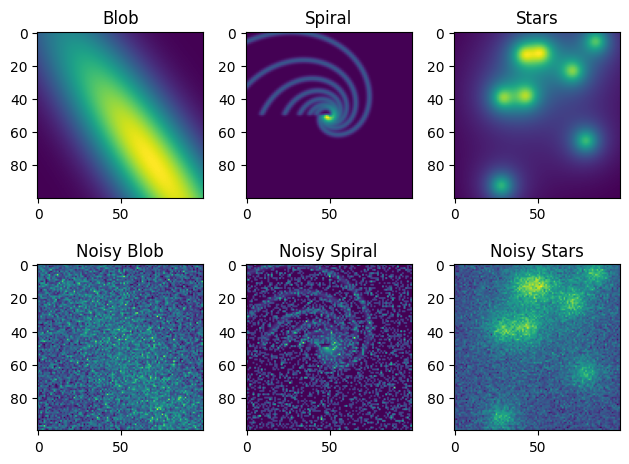

In [8]:
idx = np.random.randint(0, 5000)

fig, ax = plt.subplots(2, 3)

ax[0,0].imshow(blobs[idx])
ax[0,0].set_title('Blob')
ax[1,0].imshow(noisy_blobs[idx])
ax[1,0].set_title('Noisy Blob')
ax[0,1].imshow(spirals[idx])
ax[0,1].set_title('Spiral')
ax[1,1].imshow(noisy_spirals[idx])
ax[1,1].set_title('Noisy Spiral')
ax[0,2].imshow(stars[idx])
ax[0,2].set_title('Stars')
ax[1,2].imshow(noisy_stars[idx])
ax[1,2].set_title('Noisy Stars')

plt.tight_layout()

In [11]:
print(blobs[0].shape)
print(type(blobs[0]))
print(blobs[0].dtype)

print(np.max(blobs[0]), np.min(blobs[0]))

(100, 100)
<class 'numpy.ndarray'>
float64
2.3205982219477663 0.003831579926737661


In [11]:
data = np.concatenate((blobs, spirals, stars), axis=0)
labels = np.concatenate((np.zeros(5000), np.ones(5000), np.ones(5000) * 2))
noisy_data = np.concatenate((noisy_blobs, noisy_spirals, noisy_stars), axis=0)
noisy_labels = np.concatenate((np.zeros(5000), np.ones(5000), np.ones(5000) * 2))

In [12]:
print(data.shape, labels.shape, noisy_data.shape, noisy_labels.shape)

(15000, 100, 100) (15000,) (15000, 100, 100) (15000,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_train_noisy, x_test_noisy, y_train_noisy, y_test_noisy= train_test_split(noisy_data, noisy_labels, test_size=0.2, random_state=42)